Importing the Necessary Modules

In [19]:
import pandas as pd
from sqlalchemy import create_engine
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
import random
import json
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

Connecting to the Database

In [20]:
db_username_0 = 'simulationuser'
db_password_0 = 'simulations2024'
db_host_0 = 'localhost'
db_port_0 = '5432'
db_name_0 = 'simulations_data'
table_name_0 = 'neutral_ensembles'

In [21]:
connection_string = f"postgresql://{db_username_0}:{db_password_0}@{db_host_0}:{db_port_0}/{db_name_0}"
engine = create_engine(connection_string)
query = f"SELECT * FROM {table_name_0}"
df = pd.read_sql(query, engine)

In [22]:
# epsilon = 0.12394270273516043
# N_0_squared = 318.8640217310387
r_m = 0.1
k = 2 * np.pi * 6
m = 2 * np.pi * 3
m_u = 2 * np.pi * 7
dt = 0.001
total_time = 200
k_e_square = k**2 + m**2
k_plus_square = k**2 + (m + m_u)**2

The DataFrame

In [23]:
df.head()

,id,eps,n_0_squared,psi_e,b_e,psi_plus,b_plus,u_list,r_list,k_e_psi_e_list,k_e_b_e_list,k_e_psi_plus_list,k_e_b_plus_list,heat_flux_psi_e_b_e_list,heat_flux_psi_e_b_plus_list,b_e_psi_plus_list,b_e_b_plus_list,psi_plus_b_plus_list,eta_list
0,1,0.123943,318.864022,"[0.01901241359915969, 0.02094565213828948, 0.0...","[7.504182919637149, 5.242168510692357, 3.25751...","[0.009100088897106815, 0.008170502473702008, 0...","[11.483256211928511, 12.305335670598128, 12.99...","[0.059856969573462815, 0.11815828270323876, 0....","[5.8580779296291325, 5.794485878999542, 4.4154...","[0.0003614718708655123, 0.00043872034349823065...","[56.312761291373924, 27.480330694494526, 10.61...","[8.281161793524673e-05, 6.675711067277063e-05,...","[131.86517322879473, 151.42128596609467, 168.8...","[0.14267262939189118, 0.10980063807525715, 0.0...","[0.2183244165663046, 0.25774328040123345, 0.23...","[0.06828873166884862, 0.042831150784174675, 0....","[86.17245512737112, 64.50664316590893, 42.3345...","[0.10449865235680351, 0.10054077553635556, 0.0...","[[-0.8411228931285718], [-0.5960255888973108],..."
1,2,0.123943,318.864022,"[-0.015306956055279406, -0.018598886033249096,...","[-22.73354115582673, -20.491230321386535, -18....","[-0.0029798340913627787, -0.002542041268612154...","[-5.714632921245781, -5.906797736396248, -5.99...","[0.013500907052391837, 0.02955175617868491, 0....","[1.5443764706644225, 1.600817364258073, 1.2471...","[0.00023430290367825487, 0.0003459185616777883...","[516.8138934836678, 419.8905200841109, 327.775...","[8.879411212047838e-06, 6.461973811327293e-06,...","[32.657029424586085, 34.89025949869584, 35.959...","[0.3479813154531256, 0.38111405742852644, 0.31...","[0.08747363499756215, 0.10985985792068756, 0.1...","[0.06774218095353128, 0.05208955312160128, 0.0...","[129.9138427055833, 121.03755287834015, 108.56...","[0.017028657998352244, 0.015015323611264123, 0...","[[0.5374686361178552], [-0.011644525562716895]..."
2,3,0.123943,318.864022,"[-0.0043222238578132675, -0.006236032555439644...","[-1.3294619035737925, -0.3542331186883689, 0.7...","[0.0041149666638374185, 0.003760560668497042, ...","[4.406936470827708, 4.897727822971041, 5.27043...","[0.36158416491704687, 0.353768395661083, 0.345...","[-0.6022070478822698, -0.7940232690012407, -0....","[1.8681619077050206e-05, 3.88881020325031e-05,...","[1.767468953054052, 0.12548110237568802, 0.541...","[1.6932950644493253e-05, 1.414181654144692e-05...","[19.421089057911377, 23.987737827904656, 27.77...","[0.005746231957680487, 0.0022090092603555835, ...","[-0.019047765954078925, -0.030542390151729947,...","[-0.005470691414047993, -0.0013321151336185245...","[-5.858854149435376, -1.7349374012178274, 3.87...","[0.01813439666710534, 0.01841820261606854, 0.0...","[[0.3286912061380363], [-1.1706484548921317], ..."
3,4,0.123943,318.864022,"[0.0020231962839952003, 0.007689237656022573, ...","[3.7691035403124657, 2.533415244777452, 0.5519...","[-0.004849477429635832, -0.004313470252298938,...","[-6.798482907141981, -7.553385448183479, -8.10...","[0.44400392226342283, 0.4349503791138216, 0.41...","[-0.3322042754562684, -1.1230067013773166, -1....","[4.093323203571987e-06, 5.912437573079551e-05,...","[14.206141497595963, 6.418192802470796, 0.3046...","[2.3517431340547354e-05, 1.860602561746786e-05...","[46.21936983870168, 57.05363172882994, 65.6255...","[0.0076256362767533345, 0.019480031898484428, ...","[-0.013754665354534542, -0.05807977581862535, ...","[-0.01827818254870581, -0.01092781129506817, -...","[-25.624185994062625, -19.13586184410819, -4.4...","[0.032969089413950034, 0.03258130343488712, 0....","[[-1.7221396463680243], [1.3866704421894676], ..."
4,5,0.123943,318.864022,"[-0.003983910038470856, -0.004296501487265681,...","[2.788595648691494, 3.678930411410684, 4.39465...","[-0.0009258241146579647, -0.001288876586597915...","[5.64524711302219, 5.215129111766337, 4.683136...","[0.4059526375568249, 0.40716358056633245, 0.40...","[0.12488499705764732, 0.18749882798590878, 0.1...","

Verifying Details

In [24]:
def length_of_the_first_entry(series):
    return len(series.iloc[0])

selected_columns = df.iloc[:,3:]

lengths = selected_columns.apply(length_of_the_first_entry)
lengths

psi_e                          1000
b_e                            1000
psi_plus                       1000
b_plus                         1000
u_list                         1000
r_list                         1000
k_e_psi_e_list                 1000
k_e_b_e_list                   1000
k_e_psi_plus_list              1000
k_e_b_plus_list                1000
heat_flux_psi_e_b_e_list       1000
heat_flux_psi_e_b_plus_list    1000
b_e_psi_plus_list              1000
b_e_b_plus_list                1000
psi_plus_b_plus_list           1000
eta_list                       1000
dtype: int64

In [25]:
df.describe(include='all')

,id,eps,n_0_squared,psi_e,b_e,psi_plus,b_plus,u_list,r_list,k_e_psi_e_list,k_e_b_e_list,k_e_psi_plus_list,k_e_b_plus_list,heat_flux_psi_e_b_e_list,heat_flux_psi_e_b_plus_list,b_e_psi_plus_list,b_e_b_plus_list,psi_plus_b_plus_list,eta_list
count,1189.000000,1.189000e+03,1.189000e+03,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189
unique,NaN,NaN,NaN,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189,1189
top,NaN,NaN,NaN,"[0.01901241359915969, 0.02094565213828948, 0.0...","[7.504182919637149, 5.242168510692357, 3.25751...","[0.009100088897106815, 0.008170502473702008, 0...","[11.483256211928511, 12.305335670598128, 12.99...","[0.059856969573462815, 0.11815828270323876, 0....","[5.8580779296291325, 5.794485878999542, 4.4154...","[0.0003614718708655123, 0.00043872034349823065...","[56.312761291373924, 27.480330694494526, 10.61...","[8.281161793524673e-05, 6.675711067277063e-05,...","[131.86517322879473, 151.42128596609467, 168.8...","[0.14267262939189118, 0.10980063807525715, 0.0...","[0.2183244165663046, 0.25774328040123345, 0.23...","[0.06828873166884862, 0.042831150784174675, 0....","[86.17245512737112, 64.50664316590893, 42.3345...","[0.10449865235680351, 0.10054077553635556, 0.0...","[[-0.8411228931285718], [-0.5960255888973108],..."
freq,NaN,NaN,NaN,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
mean,595.000000,1.239427e-01,3.188640e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,343.379042,7.635995e-16,3.127704e-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.239427e-01,3.188640e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,298.000000,1.239427e-01,3.188640e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,595.000000,1.239427e-01,3.188640e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,892.000000,1.239427e-01,3.188640e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Defining Common Functions

In [26]:
def average_arrays(*arrays):
    if not arrays:
        raise ValueError("No arrays provided for averaging.")
    
    np_arrays = [np.array(arr) for arr in arrays]
    array_lengths = [len(arr) for arr in np_arrays]

    if len(set(array_lengths)) != 1:
        raise ValueError("All input arrays must have the same length.")
    
    average_array = np.mean(np_arrays, axis=0)
    
    return average_array

Composite Analysis of All the Data

In [27]:
average_psi_e = average_arrays(*list(df['psi_e']))
average_b_e = average_arrays(*list(df['b_e']))
average_psi_plus = average_arrays(*list(df['psi_plus']))
average_b_plus = average_arrays(*list(df['b_plus']))
average_U = average_arrays(*list(df['u_list']))
average_R = average_arrays(*list(df['r_list']))
average_k_e_psi_e_list = average_arrays(*list(df['k_e_psi_e_list']))
average_k_e_b_e_list = average_arrays(*list(df['k_e_b_e_list']))
average_k_e_psi_plus_list = average_arrays(*list(df['k_e_psi_plus_list']))
average_k_e_b_plus_list = average_arrays(*list(df['k_e_b_plus_list']))
average_heat_flux_psi_e_b_e_list = average_arrays(*list(df['heat_flux_psi_e_b_e_list']))
average_heat_flux_psi_e_b_plus_list = average_arrays(*list(df['heat_flux_psi_e_b_plus_list']))
average_b_e_psi_plus_list = average_arrays(*list(df['b_e_psi_plus_list']))
average_b_e_b_plus_list = average_arrays(*list(df['b_e_b_plus_list']))
average_psi_plus_b_plus_list = average_arrays(*list(df['psi_plus_b_plus_list']))
average_eta = average_arrays(*list(df['eta_list']))

In [28]:
window_size = 5000
dt = .001
epsilon = 0.12394270273516043
N_0_squared = 318.8640217310387

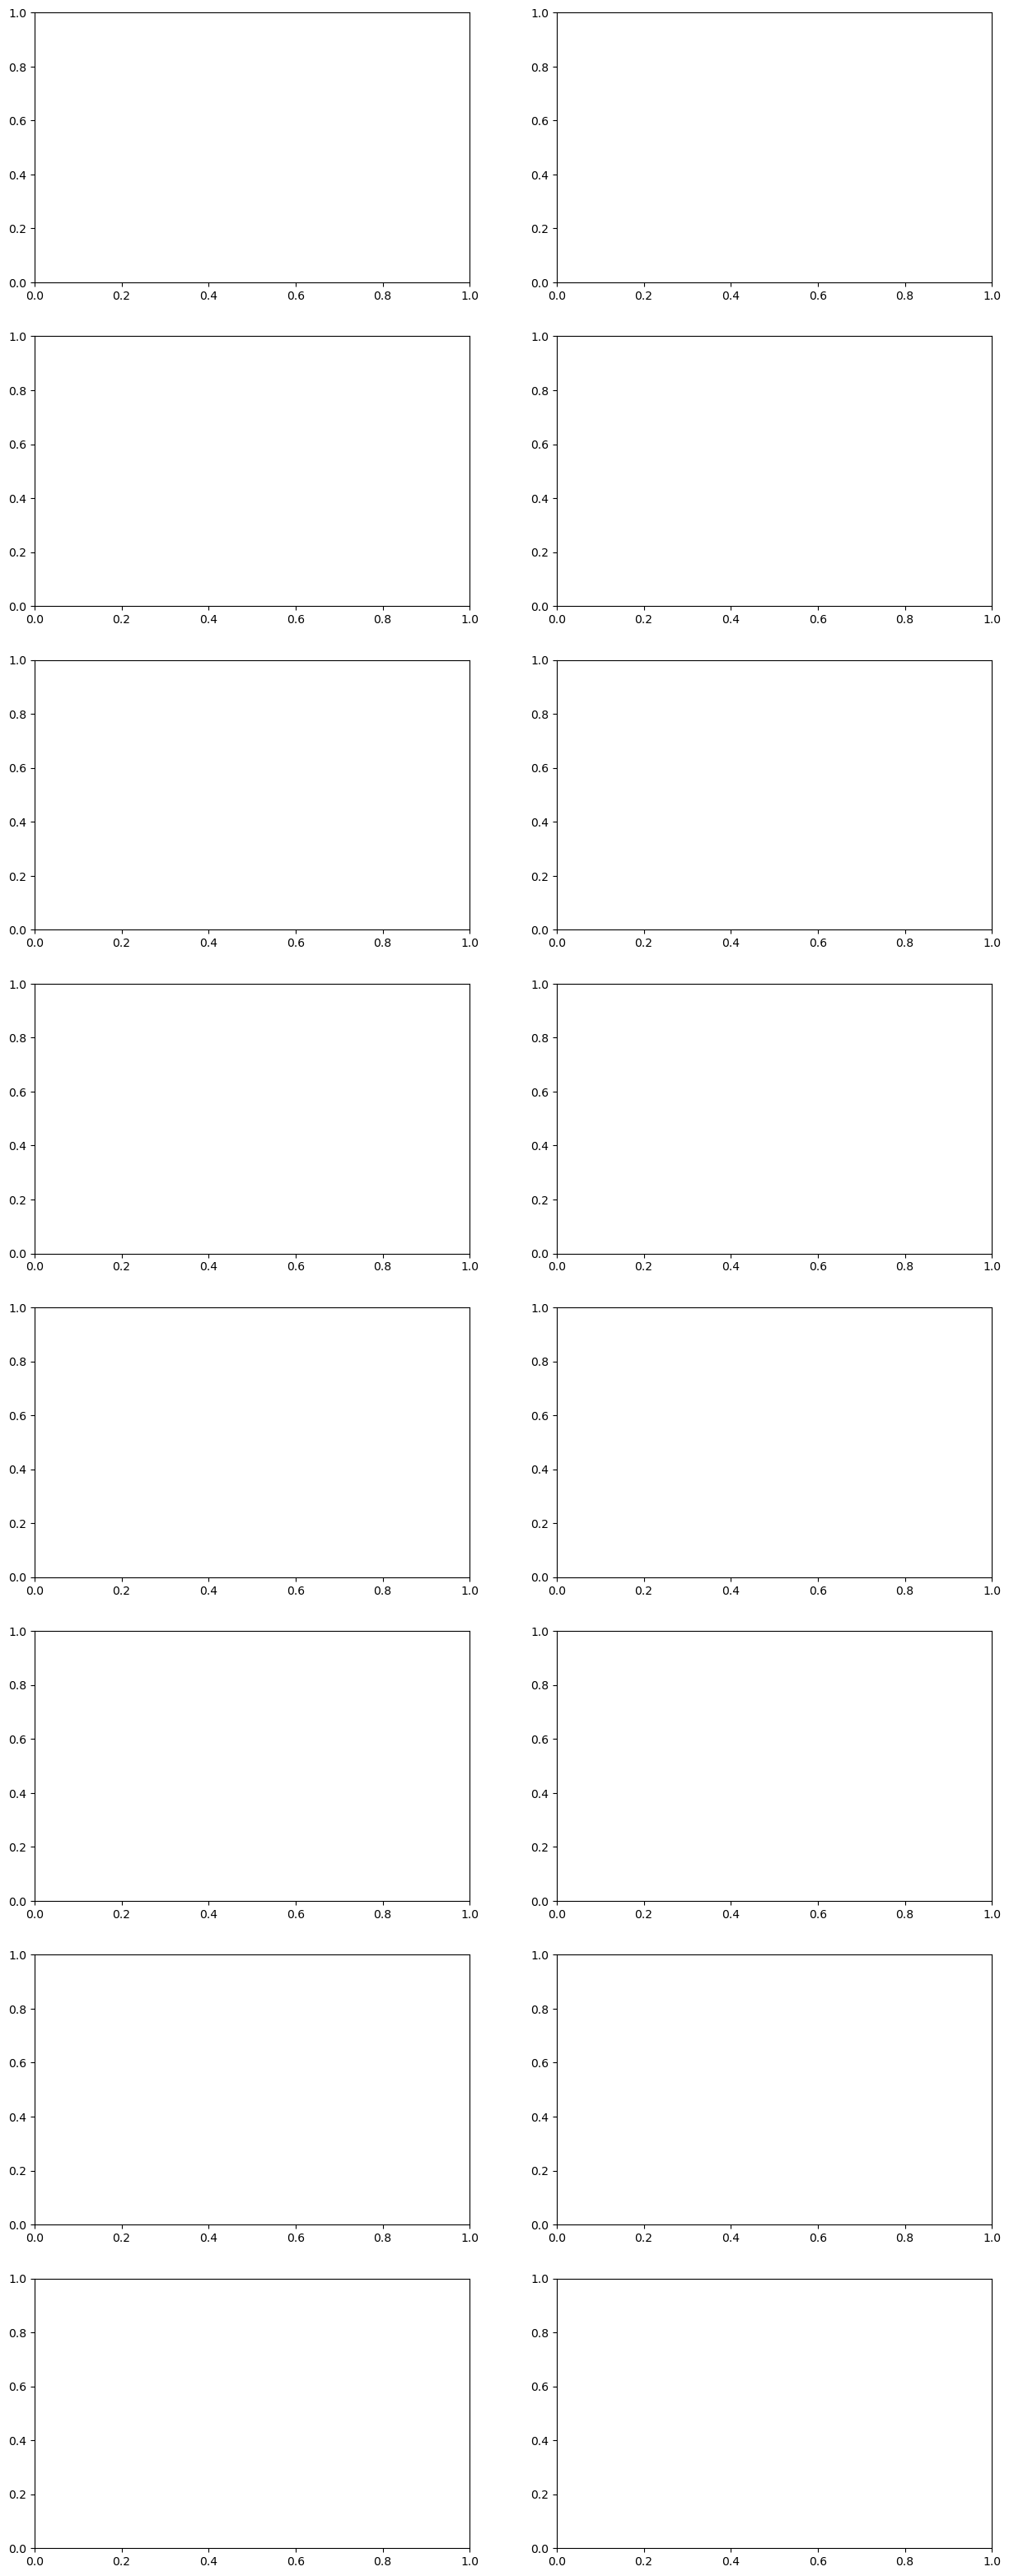

In [29]:
time_array = np.arange(-window_size/10, window_size/10) * dt * 10

fig, axs = plt.subplots(8, 2, figsize=(15, 40))


In [30]:

for i in range(5):
    axs[0, 0].plot(time_array, df['psi_e'][i], linewidth=0.5, linestyle='--', color='gray')
axs[0, 0].plot(time_array, average_psi_e, label='Average', linewidth=1.5, color='blue')
axs[0, 0].set_title(f'Average psi_e')
axs[0, 0].grid()


for i in range(5):
    axs[0, 1].plot(time_array, df['b_e'][i], linewidth=0.5, linestyle='--', color='gray')
axs[0, 1].plot(time_array, average_b_e, label='Average', linewidth=1.5, color='blue')
axs[0, 1].set_title(f'Average b_e')
axs[0, 1].grid()

for i in range(5):
    axs[1, 0].plot(time_array, df['psi_plus'][i],linewidth=0.5, linestyle='--', color='gray') 
axs[1, 0].plot(time_array, average_psi_plus, label='Average', linewidth=1.5, color='blue')
axs[1, 0].set_title(f'Average psi_plus')
axs[1, 0].grid()

for i in range(5):
    axs[1, 1].plot(time_array, df['b_plus'][i], linewidth=0.5, linestyle='--', color='gray')
axs[1, 1].plot(time_array, average_b_plus, label='Average', linewidth=1.5, color='blue')
axs[1, 1].set_title(f'Average b_plus')
axs[1, 1].grid()


In [31]:

for i in range(5):
    axs[2, 0].plot(time_array, df['u_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[2, 0].plot(time_array, average_U, label='Average', linewidth=1.5, color='blue')
axs[2, 0].set_title(f'Average U')
axs[2, 0].grid()

for i in range(5):
    axs[2, 1].plot(time_array, df['r_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[2, 1].plot(time_array, average_R, label='Average', linewidth=1.5, color='blue')
axs[2, 1].set_title(f'Average R')
axs[2, 1].grid()


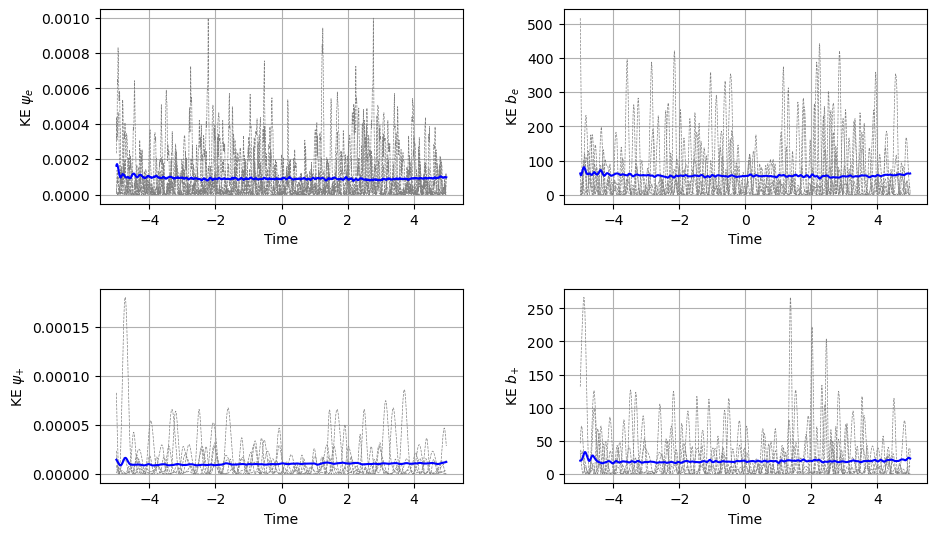

In [32]:
time_array = np.arange(-window_size / 10, window_size / 10) * dt * 10

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# KE psi_e
for i in range(5):
    axs[0, 0].plot(time_array, df['k_e_psi_e_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[0, 0].plot(time_array, average_k_e_psi_e_list, label='Average', linewidth=1.5, color='blue')
axs[0, 0].set_ylabel(r'$\text{KE } \psi_{e}$')
axs[0, 0].set_xlabel('Time')
axs[0, 0].grid()

# KE b_e
for i in range(5):
    axs[0, 1].plot(time_array, df['k_e_b_e_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[0, 1].plot(time_array, average_k_e_b_e_list, label='Average', linewidth=1.5, color='blue')
axs[0, 1].set_ylabel(r'$\text{KE } b_{e}$')
axs[0, 1].set_xlabel('Time')
axs[0, 1].grid()

# KE psi_plus
for i in range(5):
    axs[1, 0].plot(time_array, df['k_e_psi_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[1, 0].plot(time_array, average_k_e_psi_plus_list, label='Average', linewidth=1.5, color='blue')
axs[1, 0].set_ylabel(r'$\text{KE } \psi_{+}$')
axs[1, 0].set_xlabel('Time')
axs[1, 0].grid()

# KE b_plus
for i in range(5):
    axs[1, 1].plot(time_array, df['k_e_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[1, 1].plot(time_array, average_k_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
axs[1, 1].set_ylabel(r'$\text{KE } b_{+}$')
axs[1, 1].set_xlabel('Time')
axs[1, 1].grid()

# Adjust layout
plt.tight_layout(pad=3)
plt.show()


In [33]:

for i in range(5):
    axs[5, 0].plot(time_array, df['heat_flux_psi_e_b_e_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[5, 0].plot(time_array, average_heat_flux_psi_e_b_e_list, label='Average', linewidth=1.5, color='blue')
axs[5, 0].set_title(f'Average Heat Flux psi_e * b_e')
axs[5, 0].grid()

for i in range(5):
    axs[5, 1].plot(time_array, df['heat_flux_psi_e_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[5, 1].plot(time_array, average_heat_flux_psi_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
axs[5, 1].set_title(f'Average Heat Flux psi_e * b_plus')
axs[5, 1].grid()

for i in range(5):
    axs[6, 0].plot(time_array, df['b_e_psi_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[6, 0].plot(time_array, average_b_e_psi_plus_list, label='Average', linewidth=1.5, color='blue')
axs[6, 0].set_title(f'Average b_e * psi_plus')
axs[6, 0].grid()

for i in range(5):
    axs[6, 1].plot(time_array, df['b_e_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[6, 1].plot(time_array, average_b_e_b_plus_list, label='Average', linewidth=1.5, color='blue')
axs[6, 1].set_title(f'Average b_e * b_plus')
axs[6, 1].grid()

for i in range(5):
    axs[7, 0].plot(time_array, df['psi_plus_b_plus_list'][i], linewidth=0.5, linestyle='--', color='gray')
axs[7, 0].plot(time_array, average_psi_plus_b_plus_list, label='Average', linewidth=1.5, color='blue')
axs[7, 0].set_title(f'Average psi_plus * b_plus')
axs[7, 0].grid()


IndexError: index 5 is out of bounds for axis 0 with size 2

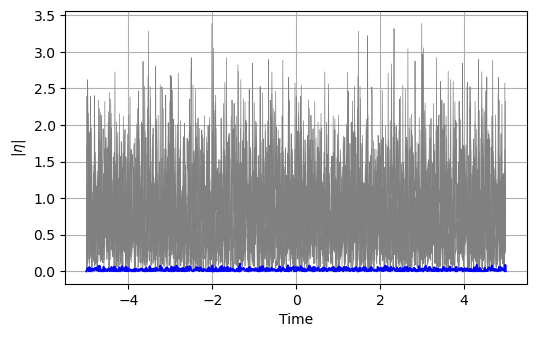

In [34]:

average_eta = [[abs(i) for i in sublist] for sublist in average_eta]

time_array = np.arange(-window_size / 10, window_size / 10) * dt * 10

# Create a single subplot
fig, ax = plt.subplots(figsize=(6, 4))

# Plot absolute value of eta_list
for i in range(5):
    ax.plot(time_array, [abs(val[0]) for val in df['eta_list'][i]], linewidth=0.5, linestyle='-', color='gray')
ax.plot(time_array, [abs(val[0]) for val in average_eta], label='Average', linewidth=1.5, color='blue')

# Labels and styling
ax.set_ylabel(r'$|\eta|$')
ax.set_xlabel('Time')
ax.grid()

# Adjust layout
plt.tight_layout(pad=3)
plt.show()

In [35]:
stopper<>

SyntaxError: invalid syntax (690568309.py, line 1)

In [36]:
#<U*k_e_psi_e>
temp_u_list = df['u_list'].apply(np.array)
temp_k_e_psi_e_list = df['k_e_psi_e_list'].apply(np.array)
UK_e_psi_e = np.array([i * j for i, j in zip(temp_u_list, temp_k_e_psi_e_list)])
average_UK_e_psi_e = average_arrays(*list(UK_e_psi_e))

In [37]:
#<U*k_e_psi_plus>
temp_u_list = df['u_list'].apply(np.array)
temp_k_e_psi_plus_list = df['k_e_psi_plus_list'].apply(np.array)
UK_e_psi_plus = np.array([i * j for i, j in zip(temp_u_list, temp_k_e_psi_plus_list)])
average_UK_e_psi_plus = average_arrays(*list(UK_e_psi_plus))

In [38]:
epsilon = 0.12394270273516043
N_0_squared = 318.8640217310387
r_m = 0.1
k = 2 * np.pi * 6
m = 2 * np.pi * 3
m_u = 2 * np.pi * 7
dt = 0.001
total_time = 200
k_e_square = k**2 + m**2
k_plus_square = k**2 + (m + m_u)**2

In [39]:
p = k / k_e_square
q = -k / k_plus_square
r = k * N_0_squared
s = -k * (k_plus_square - m_u**2) / (2*k_e_square)
t = -k * (m_u**2 - k_e_square) / (2 * k_plus_square)
v = k / 2

In [40]:
bigW = np.array([[-1, p, 0, 0], [-r, -1, 0, 0], [0, 0, -1, q], [0, 0, r, -1]])
bigL = np.array([[0, 0, s, 0], [0, 0, 0, v], [t, 0, 0, 0], [0, -v, 0, 0]])
bigQ = np.array([[8/k_e_square, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0],[0, 0, 0, 0]])

In [41]:
def create_C_matrix(row):
    length = len(row['k_e_psi_e_list'])  
    matrices = []
    
    for i in range(length):
        ke_psi_e = row['k_e_psi_e_list'][i]
        ke_b_e = row['k_e_b_e_list'][i]
        ke_psi_plus = row['k_e_psi_plus_list'][i]
        ke_b_plus = row['k_e_b_plus_list'][i]
        
        heat_flux_psi_e_b_e = row['heat_flux_psi_e_b_e_list'][i]
        heat_flux_psi_e_b_plus = row['heat_flux_psi_e_b_plus_list'][i]
        b_e_psi_plus = row['b_e_psi_plus_list'][i]
        b_e_b_plus = row['b_e_b_plus_list'][i]
        
        psi_plus_b_plus = row['psi_plus_b_plus_list'][i]
        psi_e_psi_plus = row['r_list'][i] 

        C_matrix = np.array([
            [ke_psi_e, heat_flux_psi_e_b_e, psi_e_psi_plus/(0.25 * k * (k_plus_square - k_e_square)), heat_flux_psi_e_b_plus],
            [heat_flux_psi_e_b_e, ke_b_e, b_e_psi_plus, b_e_b_plus],
            [psi_e_psi_plus/(0.25 * k * (k_plus_square - k_e_square)), b_e_psi_plus, ke_psi_plus, psi_plus_b_plus],
            [heat_flux_psi_e_b_plus, b_e_b_plus, psi_plus_b_plus, ke_b_plus]
        ])
        
        matrices.append(C_matrix)

    return matrices 

In [42]:
df['C_Matrix'] = df.apply(create_C_matrix, axis = 1)
df.head()

,id,eps,n_0_squared,psi_e,b_e,psi_plus,b_plus,u_list,r_list,k_e_psi_e_list,k_e_b_e_list,k_e_psi_plus_list,k_e_b_plus_list,heat_flux_psi_e_b_e_list,heat_flux_psi_e_b_plus_list,b_e_psi_plus_list,b_e_b_plus_list,psi_plus_b_plus_list,eta_list,C_Matrix
0,1,0.123943,318.864022,"[0.01901241359915969, 0.02094565213828948, 0.0...","[7.504182919637149, 5.242168510692357, 3.25751...","[0.009100088897106815, 0.008170502473702008, 0...","[11.483256211928511, 12.305335670598128, 12.99...","[0.059856969573462815, 0.11815828270323876, 0....","[5.8580779296291325, 5.794485878999542, 4.4154...","[0.0003614718708655123, 0.00043872034349823065...","[56.312761291373924, 27.480330694494526, 10.61...","[8.281161793524673e-05, 6.675711067277063e-05,...","[131.86517322879473, 151.42128596609467, 168.8...","[0.14267262939189118, 0.10980063807525715, 0.0...","[0.2183244165663046, 0.25774328040123345, 0.23...","[0.06828873166884862, 0.042831150784174675, 0....","[86.17245512737112, 64.50664316590893, 42.3345...","[0.10449865235680351, 0.10054077553635556, 0.0...","[[-0.8411228931285718], [-0.5960255888973108],...","[[[0.0003614718708655123, 0.14267262939189118,..."
1,2,0.123943,318.864022,"[-0.015306956055279406, -0.018598886033249096,...","[-22.73354115582673, -20.491230321386535, -18....","[-0.0029798340913627787, -0.002542041268612154...","[-5.714632921245781, -5.906797736396248, -5.99...","[0.013500907052391837, 0.02955175617868491, 0....","[1.5443764706644225, 1.600817364258073, 1.2471...","[0.00023430290367825487, 0.0003459185616777883...","[516.8138934836678, 419.8905200841109, 327.775...","[8.879411212047838e-06, 6.461973811327293e-06,...","[32.657029424586085, 34.89025949869584, 35.959...","[0.3479813154531256, 0.38111405742852644, 0.31...","[0.08747363499756215, 0.10985985792068756, 0.1...","[0.06774218095353128, 0.05208955312160128, 0.0...","[129.9138427055833, 121.03755287834015, 108.56...","[0.017028657998352244, 0.015015323611264123, 0...","[[0.5374686361178552], [-0.011644525562716895]...","[[[0.00023430290367825487, 0.3479813154531256,..."
2,3,0.123943,318.864022,"[-0.0043222238578132675, -0.006236032555439644...","[-1.3294619035737925, -0.3542331186883689, 0.7...","[0.0041149666638374185, 0.003760560668497042, ...","[4.406936470827708, 4.897727822971041, 5.27043...","[0.36158416491704687, 0.353768395661083, 0.345...","[-0.6022070478822698, -0.7940232690012407, -0....","[1.8681619077050206e-05, 3.88881020325031e-05,...","[1.767468953054052, 0.12548110237568802, 0.541...","[1.6932950644493253e-05, 1.414181654144692e-05...","[19.421089057911377, 23.987737827904656, 27.77...","[0.005746231957680487, 0.0022090092603555835, ...","[-0.019047765954078925, -0.030542390151729947,...","[-0.005470691414047993, -0.0013321151336185245...","[-5.858854149435376, -1.7349374012178274, 3.87...","[0.01813439666710534, 0.01841820261606854, 0.0...","[[0.3286912061380363], [-1.1706484548921317], ...","[[[1.8681619077050206e-05, 0.00574623195768048..."
3,4,0.123943,318.864022,"[0.0020231962839952003, 0.007689237656022573, ...","[3.7691035403124657, 2.533415244777452, 0.5519...","[-0.004849477429635832, -0.004313470252298938,...","[-6.798482907141981, -7.553385448183479, -8.10...","[0.44400392226342283, 0.4349503791138216, 0.41...","[-0.3322042754562684, -1.1230067013773166, -1....","[4.093323203571987e-06, 5.912437573079551e-05,...","[14.206141497595963, 6.418192802470796, 0.3046...","[2.3517431340547354e-05, 1.860602561746786e-05...","[46.21936983870168, 57.05363172882994, 65.6255...","[0.0076256362767533345, 0.019480031898484428, ...","[-0.013754665354534542, -0.05807977581862535, ...","[-0.01827818254870581, -0.01092781129506817, -...","[-25.624185994062625, -19.13586184410819, -4.4...","[0.032969089413950034, 0.03258130343488712, 0....","[[-1.7221396463680243], [1.3866704421894676], ...","[[[4.093323203571987e-06, 0.007625636276753334..."
4,5,0.123943,318.864022,"[-0.003983910038470856, -0.004296501487265681,...","[2.788595648691494, 3.678930411410684, 4.39

In [43]:
C_Mat_Arr = df['C_Matrix']
C_Mat_Arr

0       [[[0.0003614718708655123, 0.14267262939189118,...
1       [[[0.00023430290367825487, 0.3479813154531256,...
2       [[[1.8681619077050206e-05, 0.00574623195768048...
3       [[[4.093323203571987e-06, 0.007625636276753334...
4       [[[1.5871539194628858e-05, -0.0111095141980581...
                              ...                        
1184    [[[7.429701780238191e-05, -0.00404021974090209...
1185    [[[0.00020819377403859398, -0.1549519933224564...
1186    [[[8.830741967665852e-06, 0.051552020576716415...
1187    [[[2.2006770614333985e-05, -0.0036212222644236...
1188    [[[6.607858230292018e-05, 0.08018726352579385,...
Name: C_Matrix, Length: 1189, dtype: object

In [44]:
#<WC>

C_Mat_Arr_Multiplied = C_Mat_Arr.apply(lambda matrix_list: [bigW @ matrix for matrix in matrix_list])
C_Mat_Arr_Multiplied[0][0]

array([[ 2.66613536e-03,  1.05232128e+00,  1.27611724e-03,
         1.61031188e+00],
       [-4.48788638e+00, -1.77136480e+03, -2.14807893e+00,
        -2.71062634e+03],
       [-1.70598863e-03, -6.73352211e-01, -8.16553253e-04,
        -1.03039545e+00],
       [ 1.86146578e+00,  7.34718905e+02,  8.90970732e-01,
         1.12430168e+03]])

In [45]:
average_WC = np.mean(C_Mat_Arr_Multiplied.tolist(), axis = 0)
average_WC

array([[[ 1.43527171e-04,  1.30498327e+00,  1.70884144e-04,
         -4.25442281e-02],
        [-1.98427173e+00, -2.36306487e+02, -2.82400110e-01,
          1.45019074e+00],
        [-2.30561497e-05,  4.93791324e-03, -2.29812703e-05,
         -1.41807832e-01],
        [ 2.73230136e-01,  1.11681448e+02,  1.72430412e-01,
         -5.40948344e+00]],

       [[-3.03976568e-05,  1.23335390e+00,  1.10225639e-04,
         -5.37548927e-02],
        [-2.06059003e+00, -1.38004056e+02, -2.81977031e-01,
         -2.85039530e+01],
        [-4.09935716e-05,  1.06605080e-02, -2.48595421e-05,
         -1.43009145e-01],
        [ 2.73130125e-01,  7.78437344e+01,  1.66247661e-01,
         -1.48442823e+00]],

       [[-2.49286406e-04,  1.21176177e+00,  5.46096928e-05,
         -8.12724571e-02],
        [-2.07680082e+00, -1.37563129e+01, -2.67993729e-01,
         -6.00722972e+01],
        [-5.91739491e-05,  2.15296940e-02, -2.62877701e-05,
         -1.44435853e-01],
        [ 2.59088710e-01,  4.69739557e+

In [46]:
average_WC_term = np.mean(average_WC, axis=0)
average_WC_term

array([[-2.36781444e-04,  1.19692356e+00,  6.26579450e-05,
        -9.10618669e-02],
       [-1.10592531e+00,  2.56106520e+01, -2.02139351e-02,
         1.60907155e+02],
       [ 8.96936514e-05,  3.14047924e-02, -2.87263100e-07,
        -1.33515733e-01],
       [ 3.01716205e-02,  4.12069095e+01,  1.24005507e-01,
        -3.61840883e+01]])

In [47]:
#<CW^T>
C_Mat_Arr_Multiplied = C_Mat_Arr.apply(lambda matrix_list: [matrix @ np.transpose(bigW) for matrix in matrix_list])
C_Mat_Arr_Multiplied[0][0]

array([[ 2.66613536e-03, -4.48788638e+00, -1.70598863e-03,
         1.86146578e+00],
       [ 1.05232128e+00, -1.77136480e+03, -6.73352211e-01,
         7.34718905e+02],
       [ 1.27611724e-03, -2.14807893e+00, -8.16553253e-04,
         8.90970732e-01],
       [ 1.61031188e+00, -2.71062634e+03, -1.03039545e+00,
         1.12430168e+03]])

In [48]:
average_WC_Transpose = np.mean(C_Mat_Arr_Multiplied.tolist(), axis = 0)
average_WC_Transpose

array([[[ 1.43527171e-04, -1.98427173e+00, -2.30561497e-05,
          2.73230136e-01],
        [ 1.30498327e+00, -2.36306487e+02,  4.93791324e-03,
          1.11681448e+02],
        [ 1.70884144e-04, -2.82400110e-01, -2.29812703e-05,
          1.72430412e-01],
        [-4.25442281e-02,  1.45019074e+00, -1.41807832e-01,
         -5.40948344e+00]],

       [[-3.03976568e-05, -2.06059003e+00, -4.09935716e-05,
          2.73130125e-01],
        [ 1.23335390e+00, -1.38004056e+02,  1.06605080e-02,
          7.78437344e+01],
        [ 1.10225639e-04, -2.81977031e-01, -2.48595421e-05,
          1.66247661e-01],
        [-5.37548927e-02, -2.85039530e+01, -1.43009145e-01,
         -1.48442823e+00]],

       [[-2.49286406e-04, -2.07680082e+00, -5.91739491e-05,
          2.59088710e-01],
        [ 1.21176177e+00, -1.37563129e+01,  2.15296940e-02,
          4.69739557e+01],
        [ 5.46096928e-05, -2.67993729e-01, -2.62877701e-05,
          1.59609282e-01],
        [-8.12724571e-02, -6.00722972e+

In [49]:
average_WC_Transpose_term = np.mean(average_WC_Transpose, axis=0)
average_WC_Transpose_term

array([[-2.36781444e-04, -1.10592531e+00,  8.96936514e-05,
         3.01716205e-02],
       [ 1.19692356e+00,  2.56106520e+01,  3.14047924e-02,
         4.12069095e+01],
       [ 6.26579450e-05, -2.02139351e-02, -2.87263100e-07,
         1.24005507e-01],
       [-9.10618669e-02,  1.60907155e+02, -1.33515733e-01,
        -3.61840883e+01]])

In [50]:
#<ULC>
C_Mat_Arr_ULC_Multiplied = []

for idx, (matrix_list, u_list) in enumerate(zip(C_Mat_Arr, df['u_list'])):
    result = []
    for u, matrix in zip(u_list, matrix_list):
        uL = u * bigL  # Broadcast scalar u across the matrix L
        result_matrix = uL @ matrix  # Matrix multiplication
        result.append(result_matrix)
    C_Mat_Arr_ULC_Multiplied.append(result)

average_ULC = np.mean(C_Mat_Arr_ULC_Multiplied, axis = 0)
average_ULC

array([[[-4.49880044e-05,  7.99493831e-03, -1.07631758e-04,
          1.82903049e-02],
        [-8.61076006e-02, -9.28953649e+00, -9.46050251e-03,
          1.04984107e+02],
        [-1.32876964e-05,  8.39783875e-04, -6.84401690e-07,
          2.53257649e-03],
        [ 2.85526518e-02, -2.21961395e+02,  4.13531292e-03,
          9.28953649e+00]],

       [[-7.93669392e-05,  9.19614138e-03, -1.19461740e-04,
          1.41618697e-02],
        [-7.61798748e-02, -6.48744638e+00, -7.32510504e-03,
          1.05946884e+02],
        [-1.54805379e-05,  9.11304055e-04, -1.20740780e-06,
          2.24058455e-03],
        [ 3.09843379e-02, -2.35396367e+02,  4.75662485e-03,
          6.48744638e+00]],

       [[-1.07418647e-04,  1.72995109e-02, -1.29663260e-04,
          8.19943290e-03],
        [-6.04756574e-02, -6.74100967e+00, -4.24108598e-03,
          1.06801303e+02],
        [-1.74042695e-05,  1.45870680e-03, -1.63415791e-06,
          1.77869581e-03],
        [ 4.95960311e-02, -2.49515227e+

In [51]:
average_ULC_term = np.mean(average_ULC, axis=0)
average_ULC_term

array([[-1.82620536e-05,  1.15215388e-02, -1.39750509e-04,
         2.20780649e-02],
       [-1.13105345e-01, -3.42323263e+01, -1.14196887e-02,
         1.49113983e+02],
       [-1.76158361e-05,  1.35453897e-03, -2.77820287e-07,
         3.32662778e-03],
       [ 4.60543251e-02, -3.50956542e+02,  5.95941663e-03,
         3.42323263e+01]])

In [52]:
#<UCL^T>
C_Mat_Arr_UCLT_Multiplied = []

L_transposed = bigL.T

for idx, (matrix_list, u_list) in enumerate(zip(C_Mat_Arr, df['u_list'])):
    result = []
    for u, matrix in zip(u_list, matrix_list):
        uC = u * matrix  # Multiply the scalar u with the matrix C
        result_matrix = uC @ L_transposed  # Multiply by the transposed matrix L
        result.append(result_matrix)
    C_Mat_Arr_UCLT_Multiplied.append(result)

average_UCLT = np.mean(C_Mat_Arr_UCLT_Multiplied, axis = 0)
average_UCLT
average_UCLT_term = np.mean(average_UCLT, axis=0)
average_UCLT_term

array([[-1.82620536e-05, -1.13105345e-01, -1.76158361e-05,
         4.60543251e-02],
       [ 1.15215388e-02, -3.42323263e+01,  1.35453897e-03,
        -3.50956542e+02],
       [-1.39750509e-04, -1.14196887e-02, -2.77820287e-07,
         5.95941663e-03],
       [ 2.20780649e-02,  1.49113983e+02,  3.32662778e-03,
         3.42323263e+01]])

In [53]:
average_C_Matrix = np.mean(df['C_Matrix'].tolist(), axis = 0)
average_C_Matrix

array([[[ 1.63863592e-04,  1.44854484e-02,  2.27334322e-05,
          4.59610638e-05],
        [ 1.44854484e-02,  6.21784985e+01,  9.12401334e-03,
         -2.00268365e+00],
        [ 2.27334322e-05,  9.12401334e-03,  1.44453598e-05,
          1.21567470e-03],
        [ 4.59610638e-05, -2.00268365e+00,  1.21567470e-03,
          2.00229757e+01]],

       [[ 1.70866758e-04,  6.61945046e-03,  2.29352372e-05,
          2.57184752e-03],
        [ 6.61945046e-03,  5.84323675e+01,  6.27505847e-03,
         -2.41194418e+00],
        [ 2.29352372e-05,  6.27505847e-03,  1.39590407e-05,
          1.55243706e-03],
        [ 2.57184752e-03, -2.41194418e+00,  1.55243706e-03,
          2.01461040e+01]],

       [[ 1.73064774e-04, -3.59185980e-03,  2.19937018e-05,
          5.29516869e-03],
        [-3.59185980e-03,  5.69336659e+01,  3.60984992e-03,
         -3.58034537e+00],
        [ 2.19937018e-05,  3.60984992e-03,  1.34299928e-05,
          1.83119007e-03],
        [ 5.29516869e-03, -3.58034537e+

In [54]:
average_C_matrix = np.array(average_C_Matrix)

# Time step (assuming it's constant)
delta_t = .01  # Replace with your actual time step

# Initialize an array to store the time derivatives
dC_dt = np.zeros_like(average_C_matrix)

# Forward difference for the first time point
dC_dt[0] = (average_C_matrix[1] - average_C_matrix[0]) / delta_t

# Central difference for the intermediate points
for i in range(1, len(average_C_matrix) - 1):
    dC_dt[i] = (average_C_matrix[i + 1] - average_C_matrix[i - 1]) / (2 * delta_t)

# Backward difference for the last time point
dC_dt[-1] = (average_C_matrix[-1] - average_C_matrix[-2]) / delta_t
dC_dt.shape

(1000, 4, 4)

In [55]:
average_C_matrix.shape

(1000, 4, 4)

In [56]:
s1 = average_WC + average_WC_Transpose + average_ULC + average_UCLT + epsilon*bigQ
s1

array([[[ 7.55212615e-04, -7.57401118e-01,  2.69085406e-05,
          2.77528864e-01],
        [-7.57401118e-01, -4.91192046e+02, -2.86082915e-01,
         -3.84564878e+00],
        [ 2.69085406e-05, -2.86082915e-01, -4.73313439e-05,
          3.72904700e-02],
        [ 2.77528864e-01, -3.84564878e+00,  3.72904700e-02,
          7.76010611e+00]],

       [[ 3.38605090e-04, -8.94219863e-01, -6.57102100e-05,
          2.64521440e-01],
        [-8.94219863e-01, -2.88983005e+02, -2.77730324e-01,
         -8.01097024e+01],
        [-6.57102100e-05, -2.77730324e-01, -5.21338997e-05,
          3.02357259e-02],
        [ 2.64521440e-01, -8.01097024e+01,  3.02357259e-02,
          1.00060363e+01]],

       [[-1.55275823e-04, -9.08215192e-01, -1.51631786e-04,
          2.35611717e-01],
        [-9.08215192e-01, -4.09946452e+01, -2.49246414e-01,
         -1.55812266e+02],
        [-1.51631786e-04, -2.49246414e-01, -5.58438560e-05,
          2.59001476e-02],
        [ 2.35611717e-01, -1.55812266e+

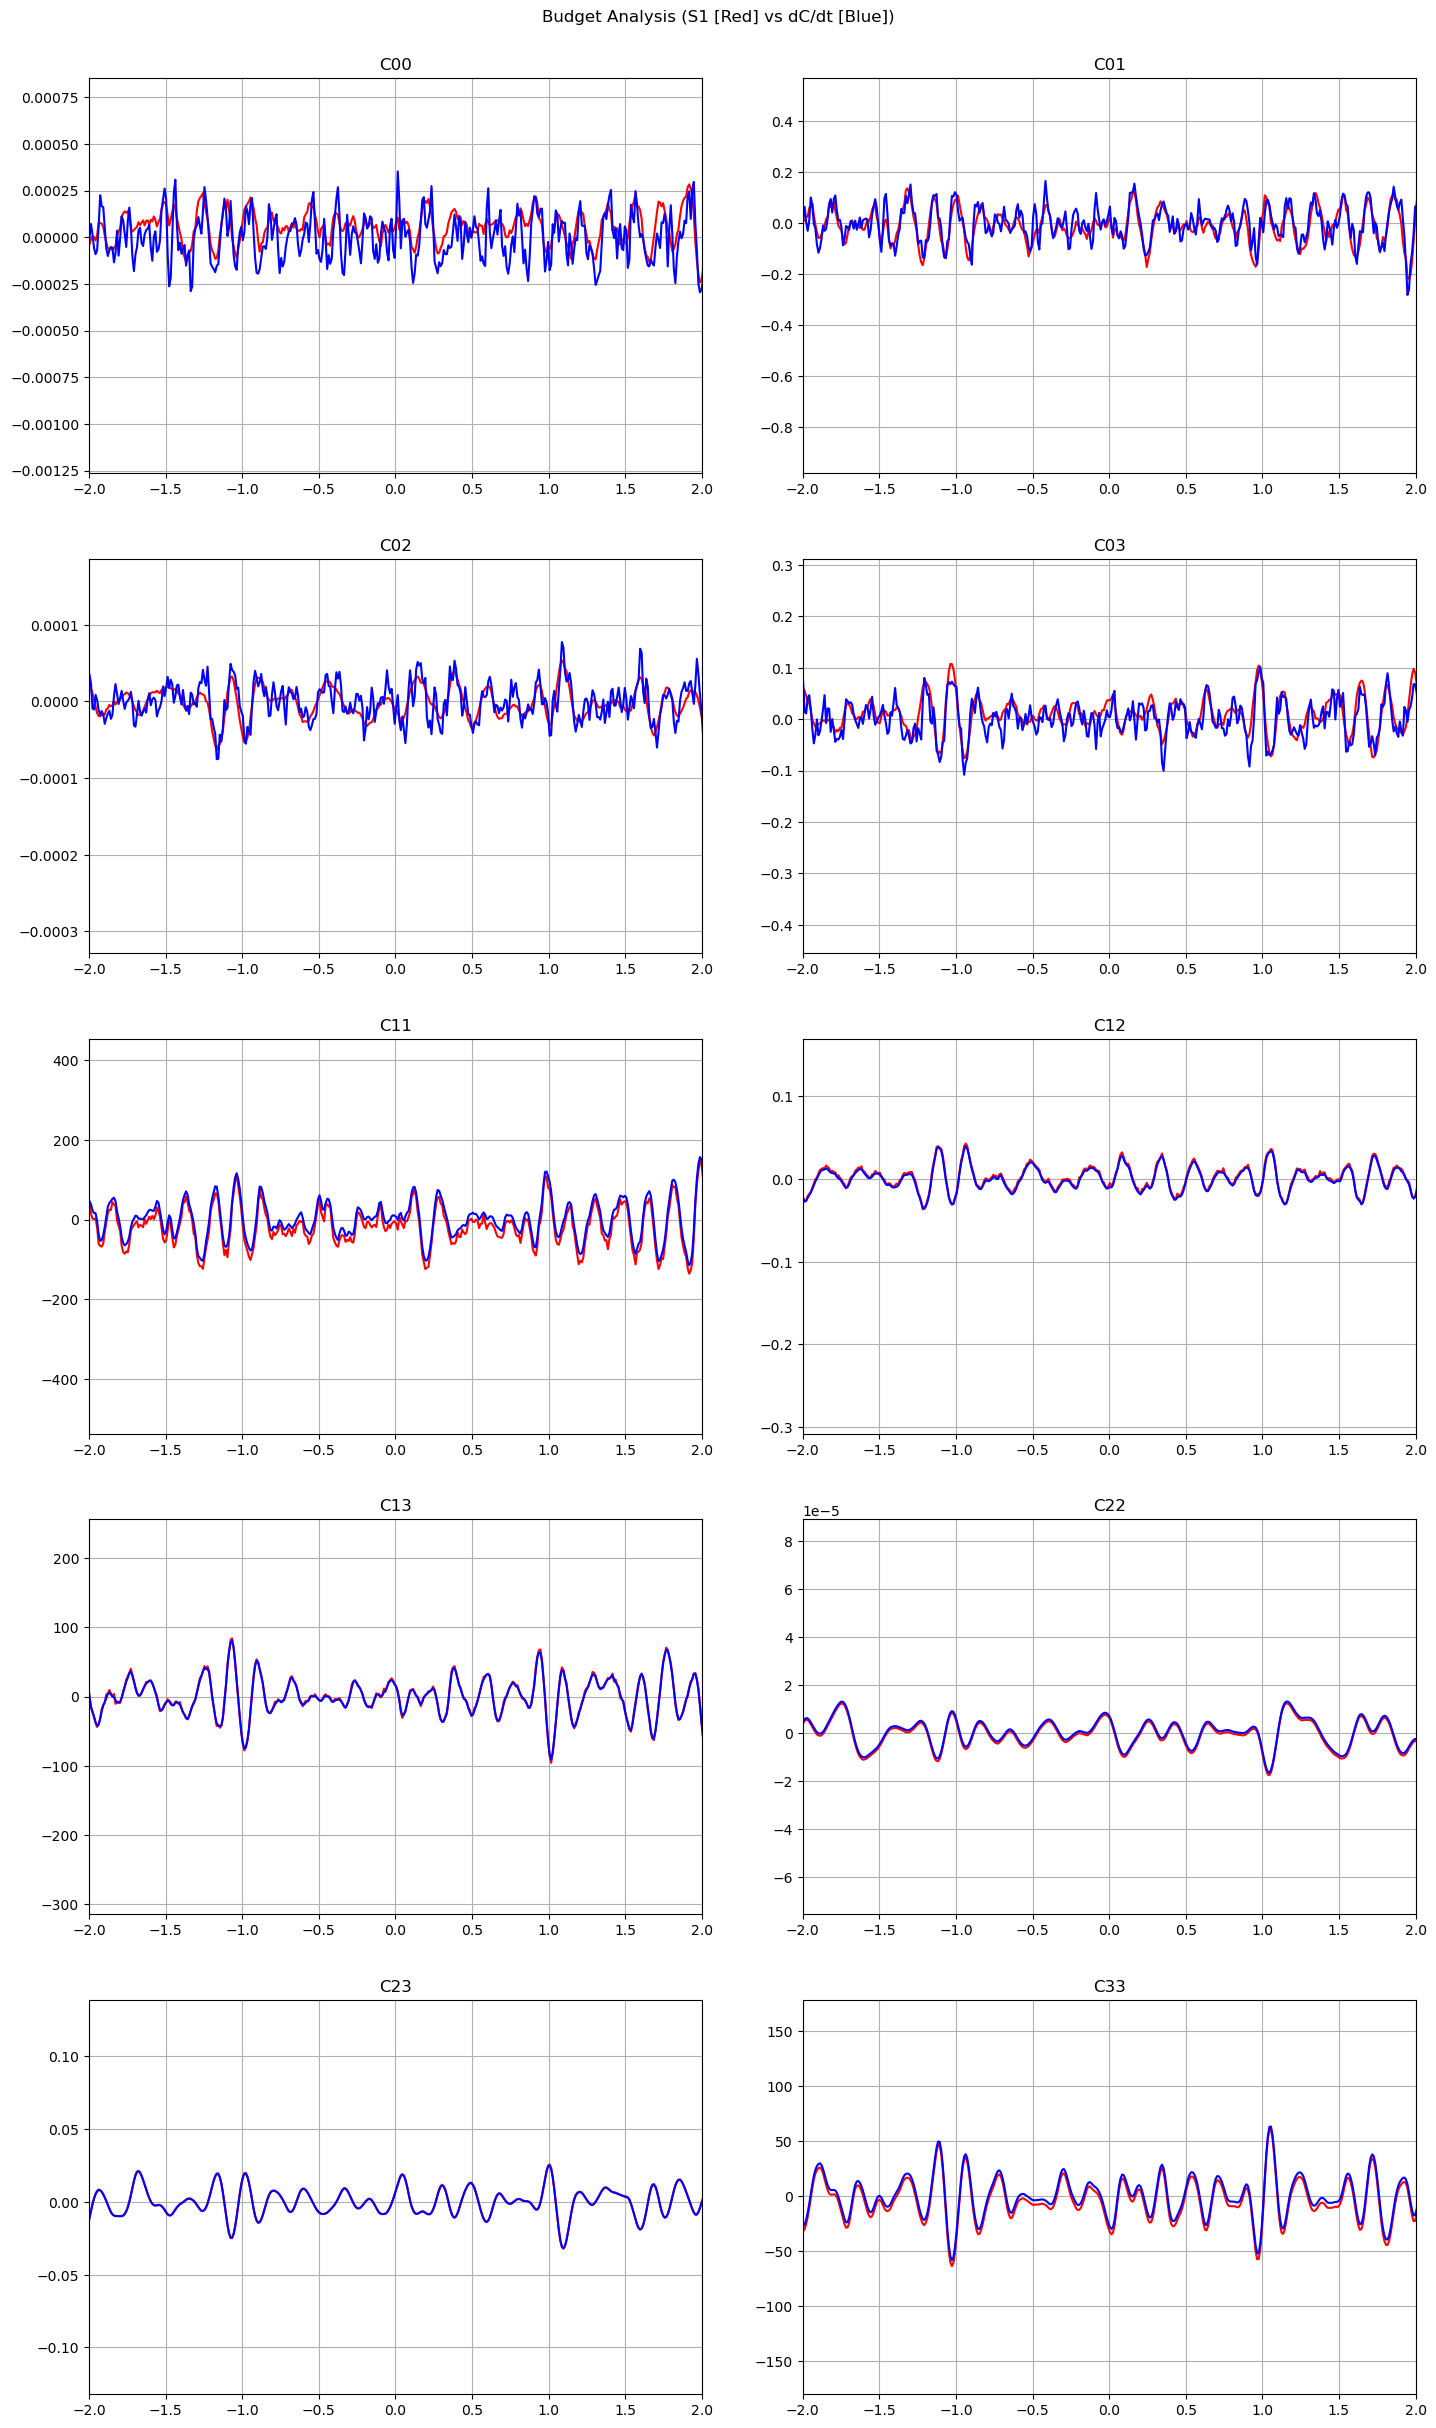

In [57]:
time_array = np.linspace(-5, 5,  int(10/.01))
# time_array = np.arange(2000/10, 2000/10) * dt * 10
#fig, axs = plt.subplots(1,1, figsize = (8, 12))
x_limit = (-2, 2)

fig, axs = plt.subplots(5, 2, figsize=(15, 25))


axs[0, 0].plot(time_array, s1[:, 0, 0],'r')
axs[0, 0].plot(time_array, dC_dt[:, 0, 0],'b')
axs[0, 0].set_title(f'C00')
axs[0, 0].set_xlim(x_limit)
axs[0, 0].grid()

axs[0, 1].plot(time_array, s1[:, 0, 1],'r')
axs[0, 1].plot(time_array, dC_dt[:, 0, 1],'b')
axs[0, 1].set_title(f'C01')
axs[0, 1].set_xlim(x_limit)
axs[0, 1].grid()

axs[1, 0].plot(time_array, s1[:, 0, 2],'r')
axs[1, 0].plot(time_array, dC_dt[:, 0, 2],'b')
axs[1, 0].set_title(f'C02')
axs[1, 0].set_xlim(x_limit)
axs[1, 0].grid()

axs[1, 1].plot(time_array, s1[:, 0, 3],'r')
axs[1, 1].plot(time_array, dC_dt[:, 0, 3],'b')
axs[1, 1].set_title(f'C03')
axs[1, 1].set_xlim(x_limit)
axs[1, 1].grid()

axs[2, 0].plot(time_array, s1[:, 1, 1],'r')
axs[2, 0].plot(time_array, dC_dt[:, 1, 1],'b')
axs[2, 0].set_title(f'C11')
axs[2, 0].set_xlim(x_limit)
axs[2, 0].grid()

axs[2, 1].plot(time_array, s1[:, 1, 2],'r')
axs[2, 1].plot(time_array, dC_dt[:, 1, 2],'b')
axs[2, 1].set_title(f'C12')
axs[2, 1].set_xlim(x_limit)
axs[2, 1].grid()

axs[3, 0].plot(time_array, s1[:, 1, 3],'r')
axs[3, 0].plot(time_array, dC_dt[:, 1, 3],'b')
axs[3, 0].set_title(f'C13')
axs[3, 0].set_xlim(x_limit)
axs[3, 0].grid()

axs[3, 1].plot(time_array, s1[:, 2, 2],'r')
axs[3, 1].plot(time_array, dC_dt[:, 2, 2],'b')
axs[3, 1].set_title(f'C22')
axs[3, 1].set_xlim(x_limit)
axs[3, 1].grid()

axs[4, 0].plot(time_array, s1[:, 2, 3],'r')
axs[4, 0].plot(time_array, dC_dt[:, 2, 3],'b')
axs[4, 0].set_title(f'C23')
axs[4, 0].set_xlim(x_limit)
axs[4, 0].grid()

axs[4, 1].plot(time_array, s1[:, 3, 3],'r')
axs[4, 1].plot(time_array, dC_dt[:, 3, 3],'b')
axs[4, 1].set_title(f'C33')
axs[4, 1].set_xlim(x_limit)
axs[4, 1].grid()


plt.suptitle(f"Budget Analysis (S1 [Red] vs dC/dt [Blue])")



#plt.subplots_adjust(wspace=.4)
#plt.subplots_adjust(hspace=.4)
plt.tight_layout(pad = 3)
plt.show()

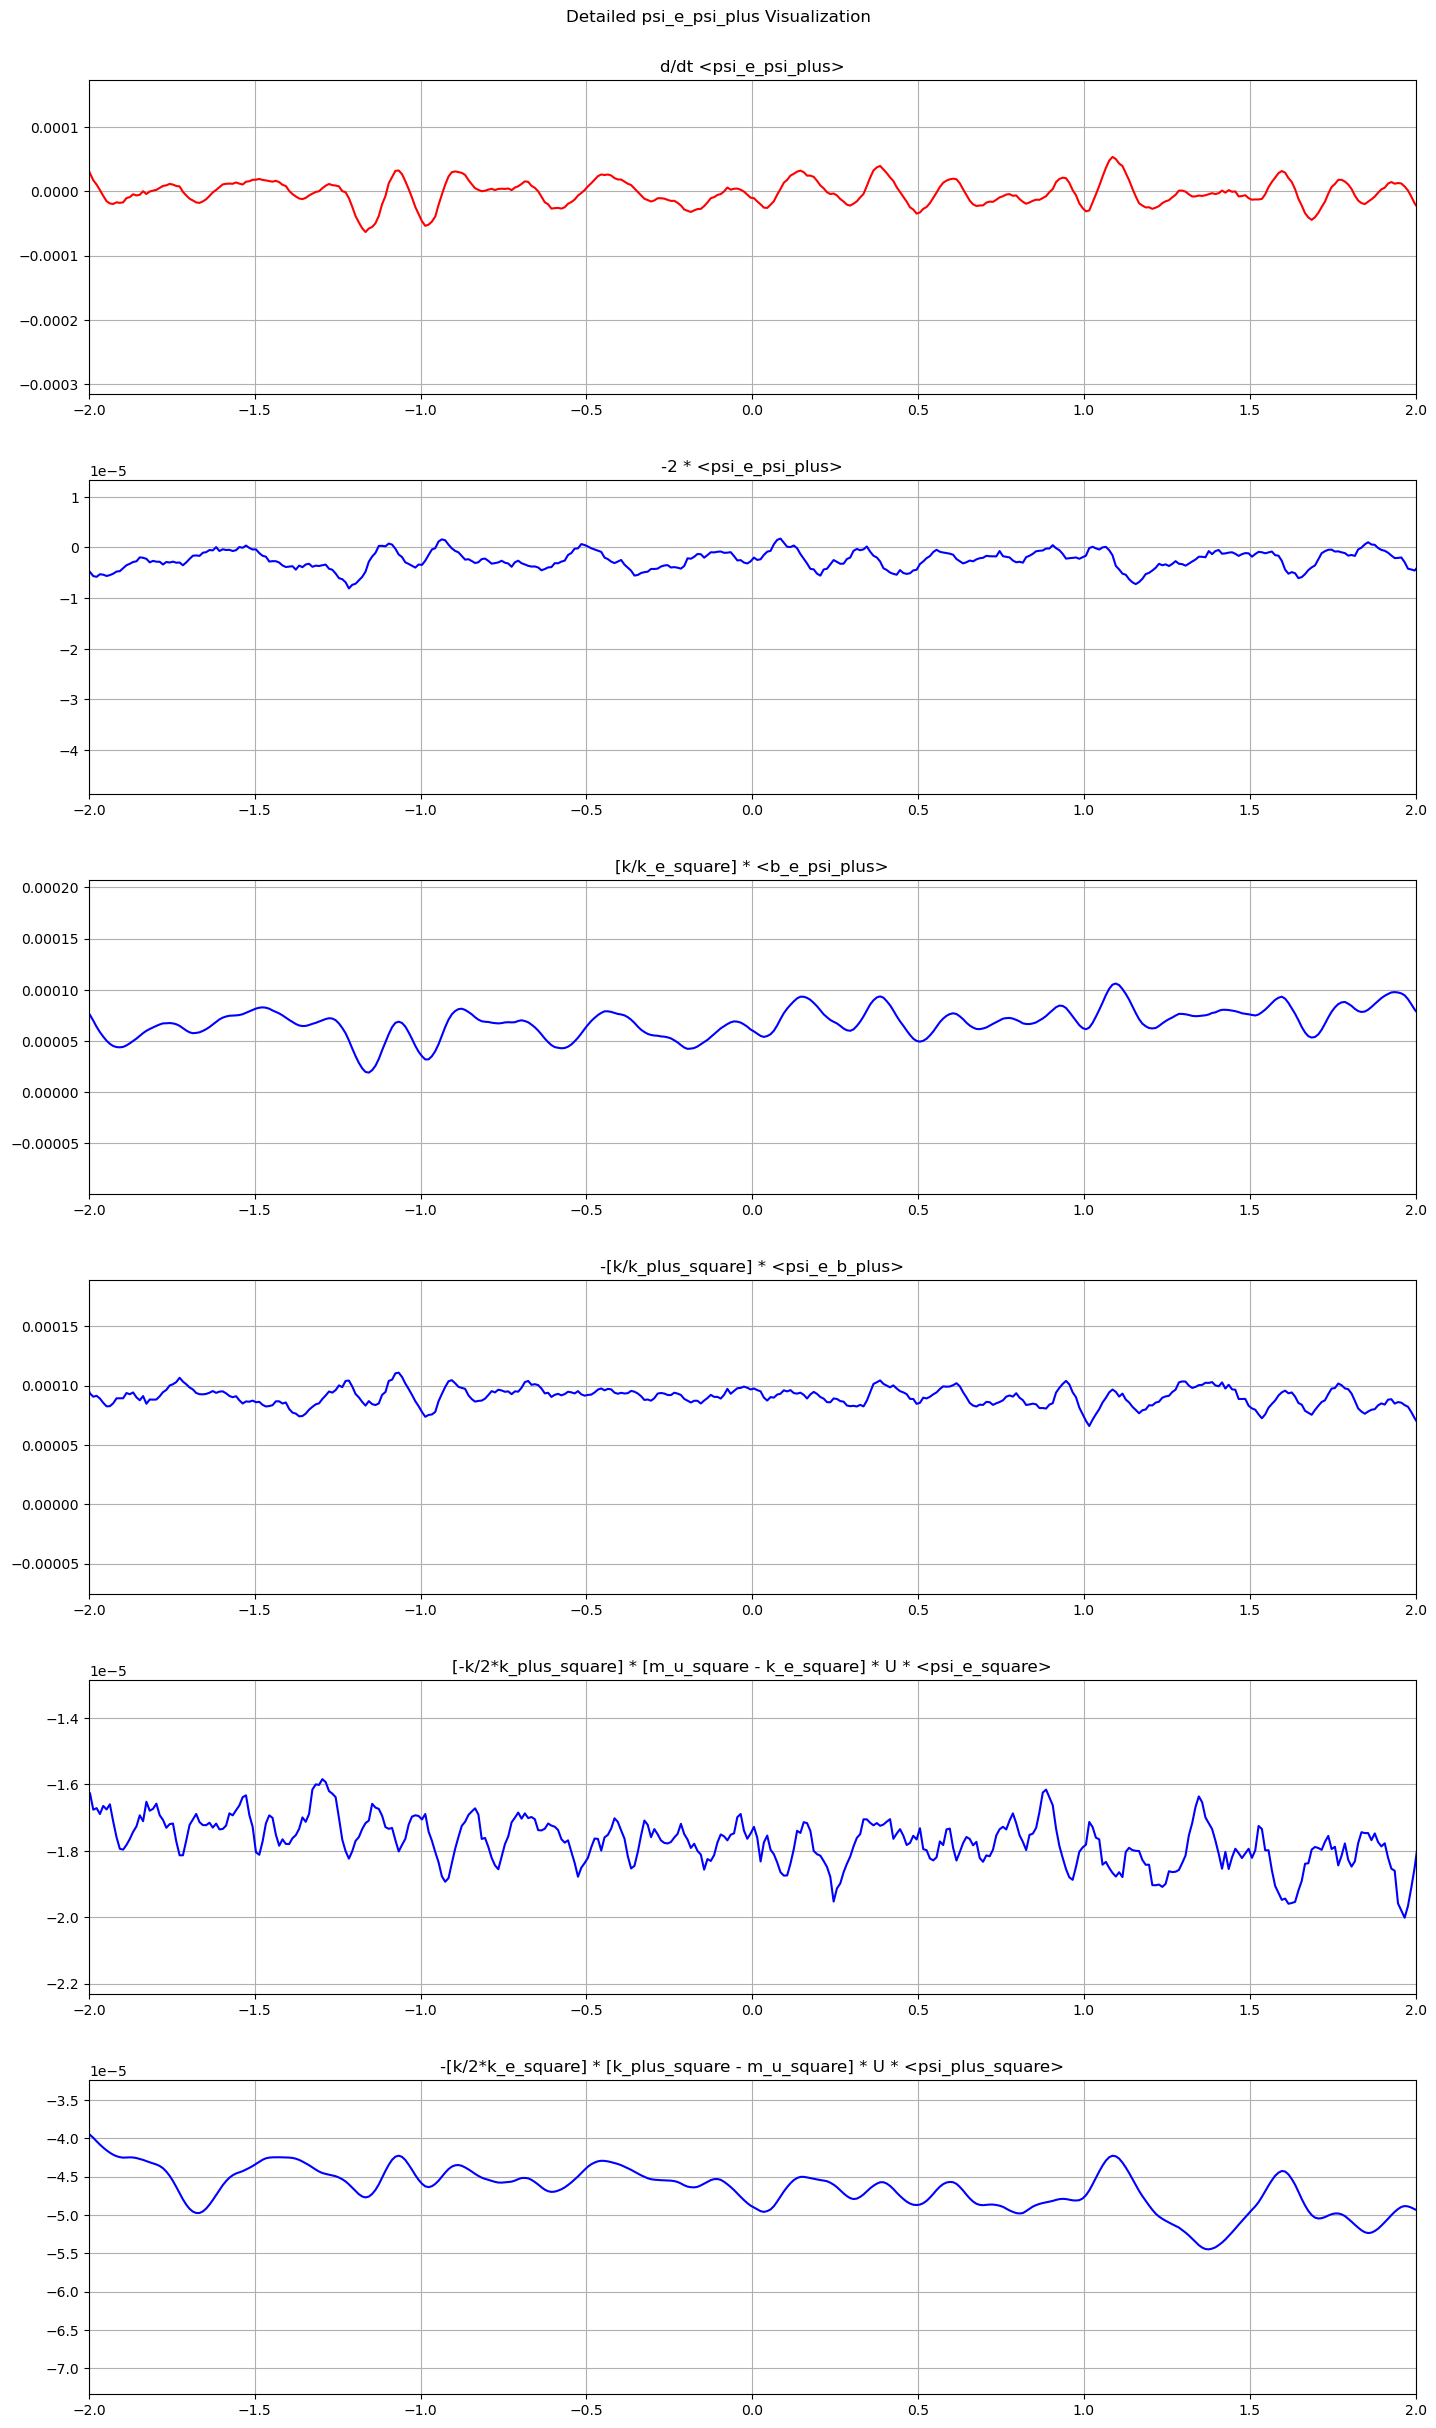

In [58]:
time_array = np.linspace(-5, 5, int(10/.01))
# time_array = np.arange(2000/10, 2000/10) * dt * 10
#fig, axs = plt.subplots(1,1, figsize = (8, 12))
x_limit = (-2, 2)

fig, axs = plt.subplots(6, 1, figsize=(15, 25))


axs[0].plot(time_array, s1[:, 0, 2],'r')
axs[0].set_title(f'd/dt <psi_e_psi_plus>')
axs[0].set_xlim(x_limit)
axs[0].grid()

axs[1].plot(time_array, -2 * average_R/(0.25 * k * (k_plus_square - k_e_square)),'b')
axs[1].set_title(f'-2 * <psi_e_psi_plus>')
axs[1].set_xlim(x_limit)
axs[1].grid()

axs[2].plot(time_array, (k/k_e_square) * average_b_e_psi_plus_list,'b')
axs[2].set_title(f'[k/k_e_square] * <b_e_psi_plus>')
axs[2].set_xlim(x_limit)
axs[2].grid()

axs[3].plot(time_array, (-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list,'b')
axs[3].set_title(f'-[k/k_plus_square] * <psi_e_b_plus>')
axs[3].set_xlim(x_limit)
axs[3].grid()

axs[4].plot(time_array, (-k/(2*k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e),'b')
axs[4].set_title(f'[-k/2*k_plus_square] * [m_u_square - k_e_square] * U * <psi_e_square>')
axs[4].set_xlim(x_limit) 
axs[4].grid()

axs[5].plot(time_array, (-k/(2*k_plus_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus),'b')
axs[5].set_title(f'-[k/2*k_e_square] * [k_plus_square - m_u_square] * U * <psi_plus_square>')
axs[5].set_xlim(x_limit)
axs[5].grid()


plt.suptitle(f"Detailed psi_e_psi_plus Visualization")



#plt.subplots_adjust(wspace=.4)
#plt.subplots_adjust(hspace=.4)
plt.tight_layout(pad = 3)
plt.show()

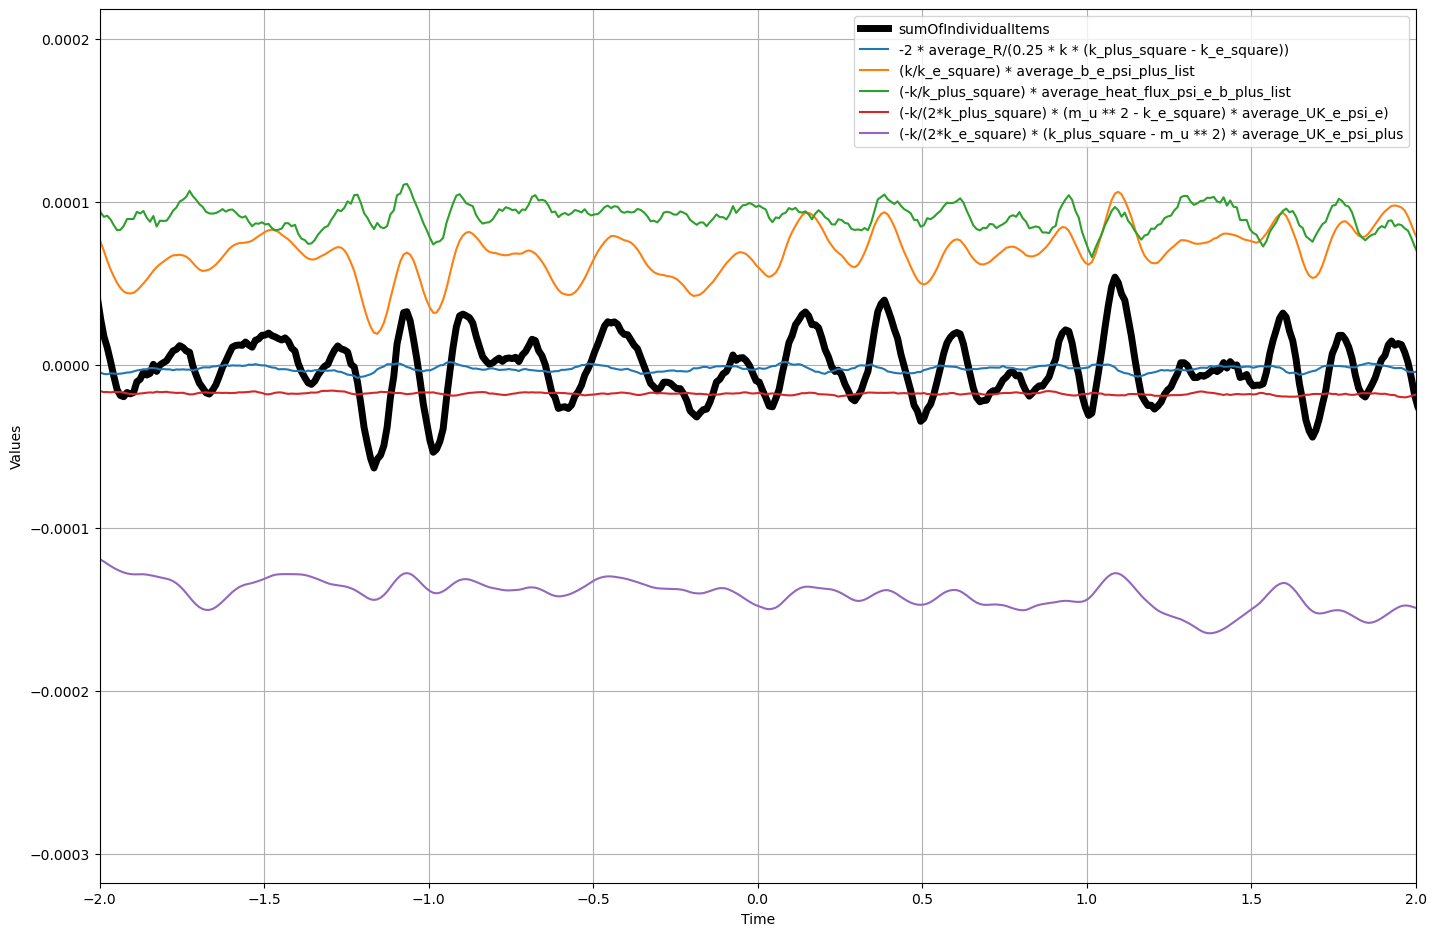

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

labels = [
    'dC/dt[:, 0, 2]',
    'sumOfIndividualItems',
    '-2 * average_R/(0.25 * k * (k_plus_square - k_e_square))',
    '(k/k_e_square) * average_b_e_psi_plus_list',
    '(-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list',
    '(-k/(2*k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e)',
    '(-k/(2*k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus'
]

sumOfIndividualItems = (-2 * average_R / (0.25 * k * (k_plus_square - k_e_square))) + \
                       ((k / k_e_square) * average_b_e_psi_plus_list) + \
                       ((-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list) + \
                       ((-k / (2 * k_plus_square) * (np.square(m_u) - k_e_square) * average_UK_e_psi_e)) + \
                       ((-k / (2 * k_e_square) * (k_plus_square - np.square(m_u)) * average_UK_e_psi_plus))

# ax.plot(time_array, dC_dt[:, 0, 2], '--r',label=labels[0], lw = 3)
ax.plot(time_array, sumOfIndividualItems,'-k',label=labels[1], lw = 5)
ax.plot(time_array, -2 * average_R / (0.25 * k * (k_plus_square - k_e_square)), label=labels[2])
# ax.plot(time_array, average_R/1000, '-b', lw = 3)
ax.plot(time_array, (k / k_e_square) * average_b_e_psi_plus_list, label=labels[3])
ax.plot(time_array, (-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list, label=labels[4])
ax.plot(time_array, -(k / (2 * k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e), label=labels[5])
ax.plot(time_array, -(k / (2 * k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus), label=labels[6])


ax.set_xlim(x_limit)
ax.grid(True)
ax.set_xlabel("Time")
ax.set_ylabel("Values")

ax.legend(loc='best')

# plt.suptitle(f"Detailed psi_e_psi_plus Visualization (For not flips)", fontsize=16)

plt.tight_layout(pad=3)
plt.show()

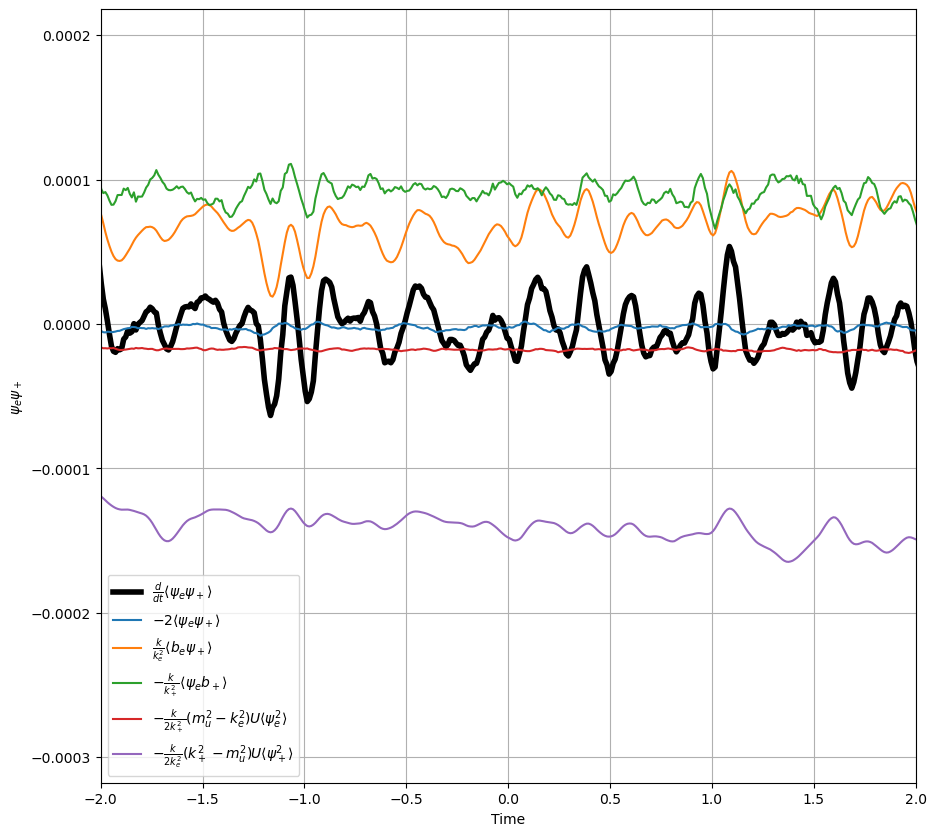

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(10, 9))

# Plot all terms with LaTeX-formatted labels
ax.plot(time_array, sumOfIndividualItems, '-k', lw=4, label=r"$\frac{d}{dt} \langle \psi_e \psi_+ \rangle$")
ax.plot(time_array, -2 * average_R / (0.25 * k * (k_plus_square - k_e_square)),
        label=r"$-2 \langle \psi_e \psi_+ \rangle$")
ax.plot(time_array, (k / k_e_square) * average_b_e_psi_plus_list,
        label=r"$\frac{k}{k_e^2} \langle b_e \psi_+ \rangle$")
ax.plot(time_array, (-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list,
        label=r"$-\frac{k}{k_+^2} \langle \psi_e b_+ \rangle$")
ax.plot(time_array, -(k / (2 * k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e),
        label=r"$-\frac{k}{2k_+^2} (m_u^2 - k_e^2) U \langle \psi_e^2 \rangle$")
ax.plot(time_array, -(k / (2 * k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus),
        label=r"$-\frac{k}{2k_e^2} (k_+^2 - m_u^2) U \langle \psi_+^2 \rangle$")

ax.set_xlim(x_limit)
ax.grid(True)
ax.set_xlabel("Time")
ax.set_ylabel(r"$\psi_e \psi_+$")

# Clean legend formatting
ax.legend(loc='best', fontsize=10)

plt.tight_layout(pad=3)
plt.show()


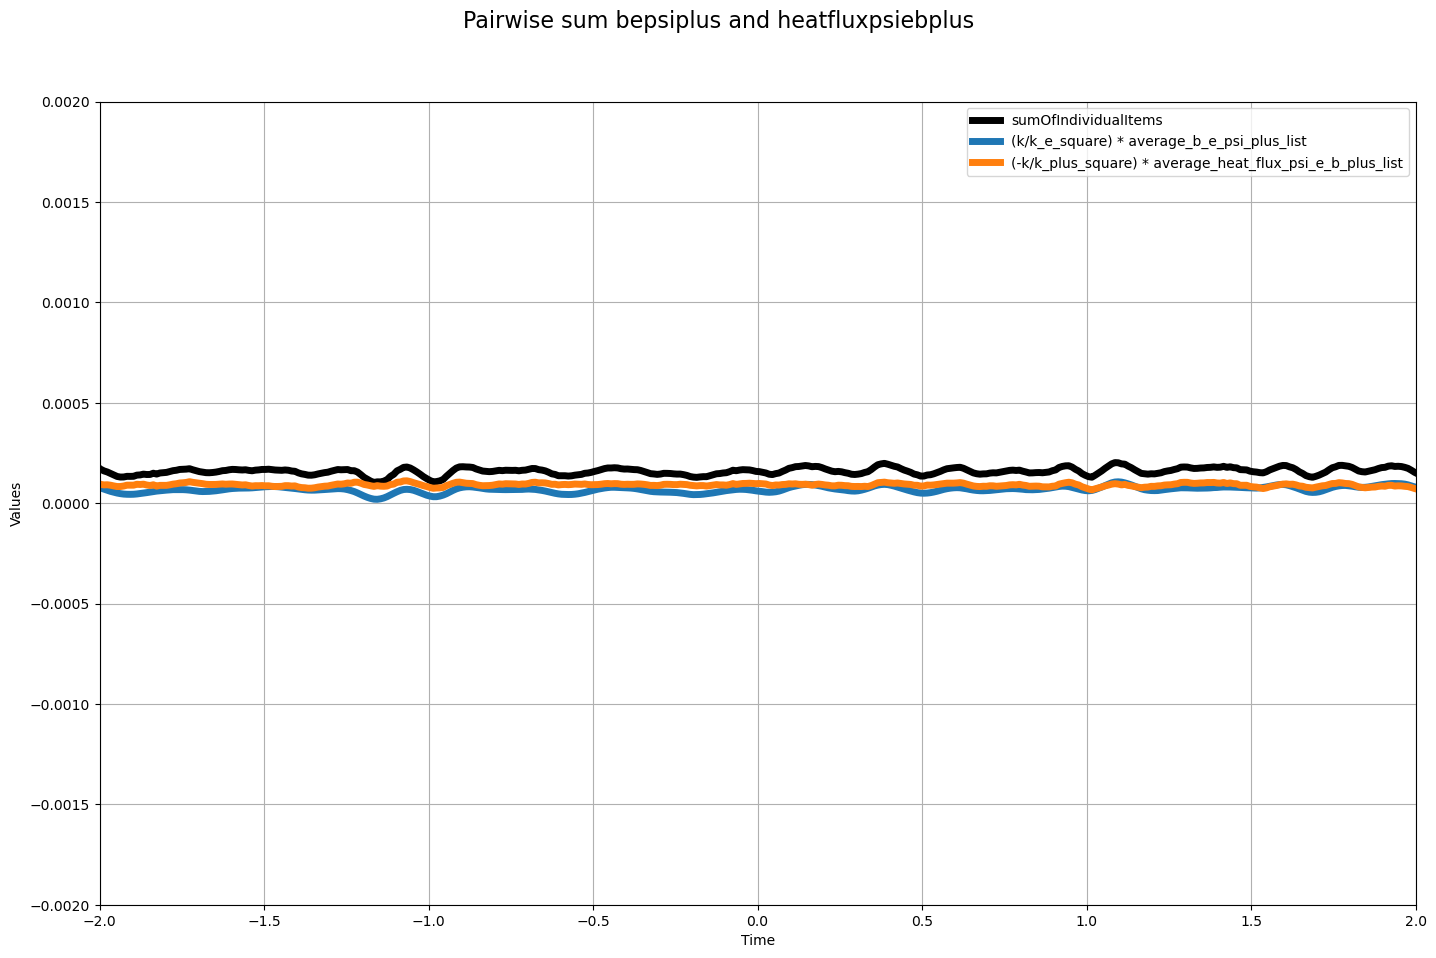

In [60]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

labels = [
    'dC/dt[:, 0, 2]',
    'sumOfIndividualItems',
    '-2 * average_R/(0.25 * k * (k_plus_square - k_e_square))',
    '(k/k_e_square) * average_b_e_psi_plus_list',
    '(-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list',
    '(-k/(2*k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e)',
    '(-k/(2*k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus'
]

sumOfIndividualItems = ((k / k_e_square) * average_b_e_psi_plus_list) + \
                       ((-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list) 
                        # ((-k / (2 * k_e_square) * (k_plus_square - np.square(m_u)) * average_UK_e_psi_plus))

# ax.plot(time_array, dC_dt[:, 0, 2], '--r',label=labels[0], lw = 3)
ax.plot(time_array, sumOfIndividualItems,'-k',label=labels[1], lw = 5)
# ax.plot(time_array, -2 * average_R / (0.25 * k * (k_plus_square - k_e_square)), label=labels[2])
# # ax.plot(time_array, average_R/1000, '-b', lw = 3)
ax.plot(time_array, (k / k_e_square) * average_b_e_psi_plus_list, label=labels[3], lw = 5)
ax.plot(time_array, (-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list, label=labels[4], lw = 5)
# ax.plot(time_array, -(k / (2 * k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e), label=labels[5])
# ax.plot(time_array, -(k / (2 * k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus), label=labels[6])


ax.set_xlim(x_limit)
ax.set_ylim((-.002, .002))
ax.grid(True)
ax.set_xlabel("Time")
ax.set_ylabel("Values")

ax.legend(loc='best')

plt.suptitle(f"Pairwise sum bepsiplus and heatfluxpsiebplus", fontsize=16)

plt.tight_layout(pad=3)
plt.show()

#Sum of the 2 heat flux terms

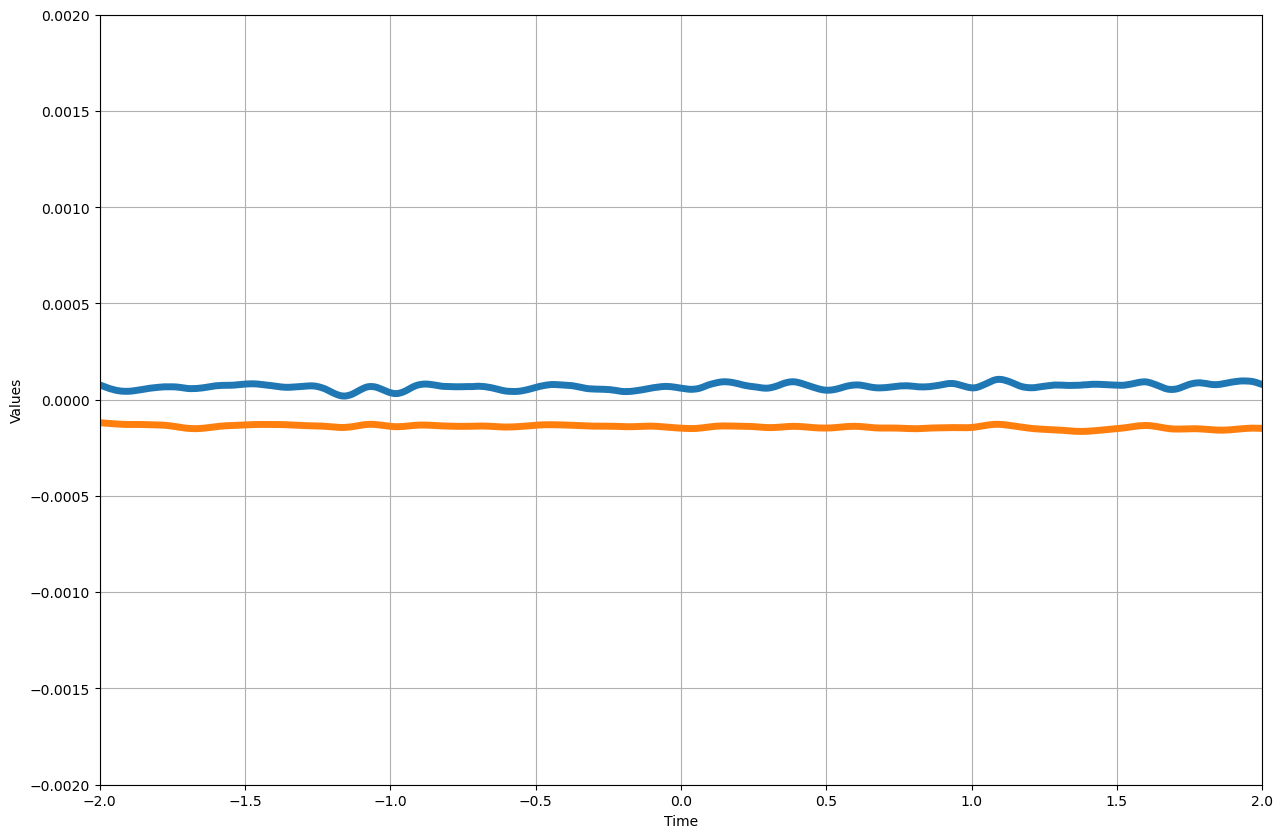

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

labels = [
    'dC/dt[:, 0, 2]',
    'sumOfIndividualItems',labels[2],
    '-2 * average_R/(0.25 * k * (k_plus_square - k_e_square))',
    '(k/k_e_square) * average_b_e_psi_plus_list',
    '(-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list',
    '(-k/(2*k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e)',
    '(-k/(2*k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus'
]

ax.plot(time_array, ((k / k_e_square) * average_b_e_psi_plus_list),label=labels[3], lw = 5)
ax.plot(time_array, (-k / (2 * k_e_square) * (k_plus_square - np.square(m_u)) * average_UK_e_psi_plus),label=labels[6], lw = 5)
# ax.plot(time_array, -2 * average_R / (0.25 * k * (k_plus_square - k_e_square)), label=labels[2])
# # ax.plot(time_array, average_R/1000, '-b', lw = 3)
# ax.plot(time_array, (k / k_e_square) * average_b_e_psi_plus_list, label=labels[3])
# ax.plot(time_array, (-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list, label=labels[4])
# ax.plot(time_array, -(k / (2 * k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e), label=labels[5])
# ax.plot(time_array, -(k / (2 * k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus), label=labels[6])


ax.set_xlim(x_limit)
ax.set_ylim((-.002, .002))
ax.grid(True)
ax.set_xlabel("Time")
ax.set_ylabel("Values")
labels[2]
plt.show()

#Sum of the b_e_psi_plus + kinetic energy of exicted wave

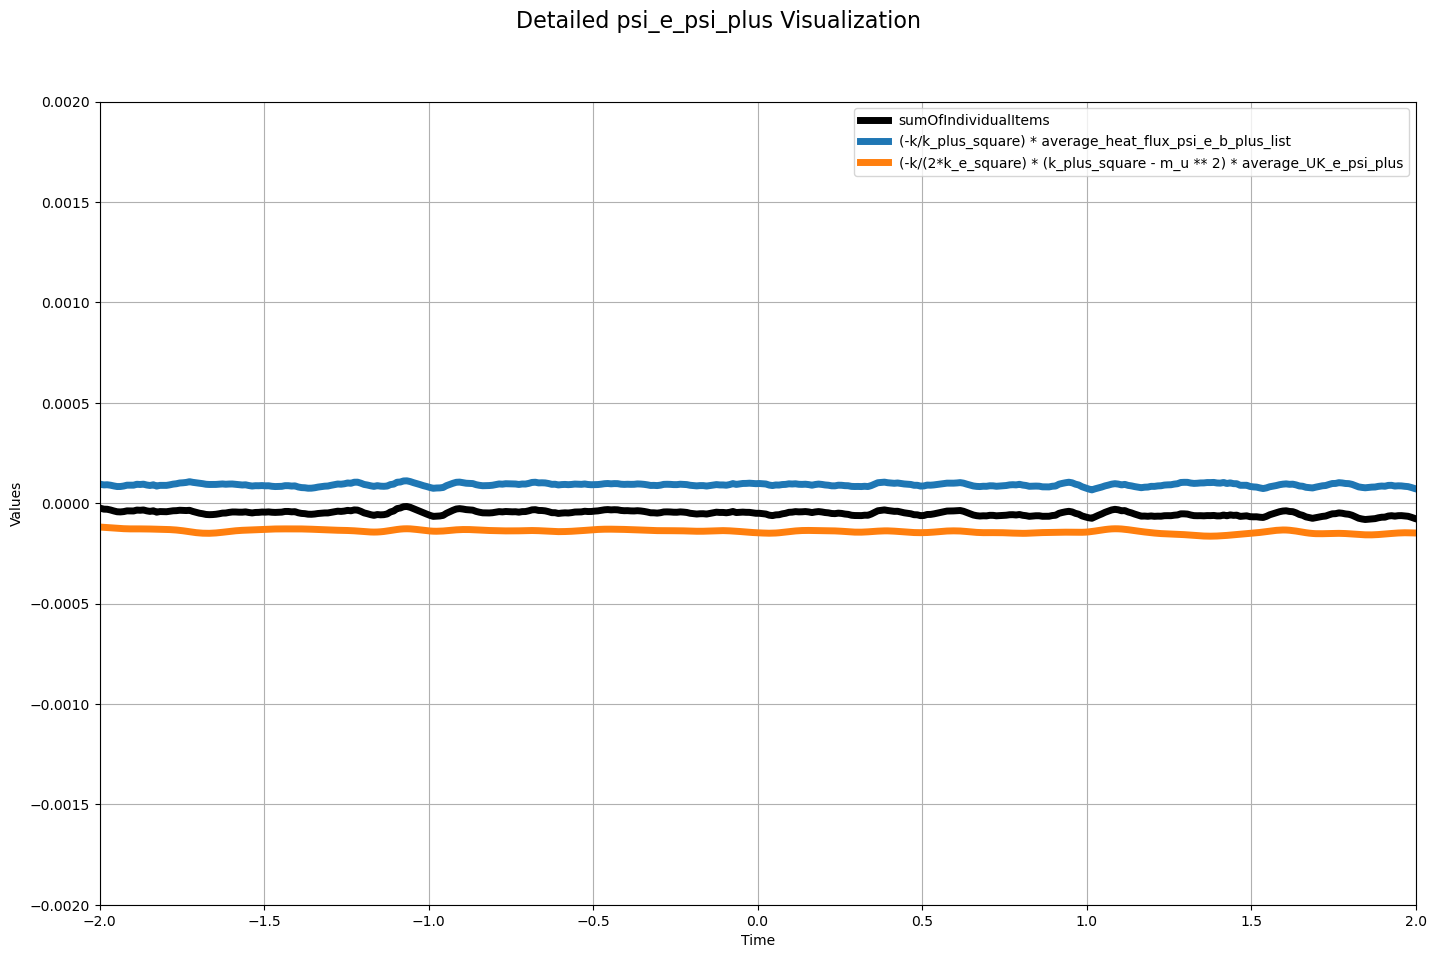

In [62]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

labels = [
    'dC/dt[:, 0, 2]',
    'sumOfIndividualItems',
    '-2 * average_R/(0.25 * k * (k_plus_square - k_e_square))',
    '(k/k_e_square) * average_b_e_psi_plus_list',
    '(-k/k_plus_square) * average_heat_flux_psi_e_b_plus_list',
    '(-k/(2*k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e)',
    '(-k/(2*k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus'
]

sumOfIndividualItems = -(k / (2 * k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus) + \
                       ((-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list)
                        # ((-k / (2 * k_e_square) * (k_plus_square - np.square(m_u)) * average_UK_e_psi_plus))

# ax.plot(time_array, dC_dt[:, 0, 2], '--r',label=labels[0], lw = 3)
ax.plot(time_array, sumOfIndividualItems,'-k',label=labels[1], lw = 5)
# ax.plot(time_array, -2 * average_R / (0.25 * k * (k_plus_square - k_e_square)), label=labels[2])
# # ax.plot(time_array, average_R/1000, '-b', lw = 3)
# ax.plot(time_array, (k / k_e_square) * average_b_e_psi_plus_list, label=labels[3])
ax.plot(time_array, (-k / k_plus_square) * average_heat_flux_psi_e_b_plus_list, label=labels[4], lw = 5)
# ax.plot(time_array, -(k / (2 * k_plus_square) * (m_u ** 2 - k_e_square) * average_UK_e_psi_e), label=labels[5])
ax.plot(time_array, -(k / (2 * k_e_square) * (k_plus_square - m_u ** 2) * average_UK_e_psi_plus), label=labels[6], lw = 5)


ax.set_xlim(x_limit)
ax.set_ylim((-.002, .002))
ax.grid(True)
ax.set_xlabel("Time")
ax.set_ylabel("Values")

ax.legend(loc='best')

plt.suptitle(f"Detailed psi_e_psi_plus Visualization", fontsize=16)

plt.tight_layout(pad=3)
plt.show()

#Sum of kepsi plus and psiebplus